# Climate dynamics
## Predicting the weather: timeseries approach
In this part of the climate dynamics tutorial, we will try to predict the temperature in Oxford on 19th November 2025. Here we will use timeseries data from a historical simulation of a climate model.

In [1]:
!git clone https://github.com/peterukk/IE_CDT_ClimateDynamicsTutorial

Cloning into 'IE_CDT_ClimateDynamicsTutorial'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 16 (delta 0), reused 2 (delta 0), pack-reused 13 (from 1)
Receiving objects: 100% (16/16), 94.68 MiB | 15.95 MiB/s, done.
Resolving deltas: 100% (1/1), done.


Import all the requirements we need. We will be using `xarray` to open datasets again.

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#import nc_time_axis
#from IPython.display import display, Latex

As we are using timeseries data, we will select daily time resolution. Since the task requires us to use CMIP6 data, we will use the historical experiment - this means it is the CMIP6 historical simulation, so it is may not be exactly in line with observations.

In [3]:
data_path = "IE_CDT_ClimateDynamicsTutorial/data/"
filename = data_path + "t_CMIP6_historical_HadGEM3-GC31-LL_mon_195001-201412_UK.nc"

In [4]:
ds = xr.open_dataset(filename)
ds

<xarray.Dataset> Size: 22kB
Dimensions:          (bnds: 2, time: 780)
Coordinates:
  * time             (time) datetime64[ns] 6kB 1950-01-01 ... 2014-12-01
    lat              float64 8B ...
    lon              float64 8B ...
    member_id        <U29 116B ...
    gcm_institution  <U4 16B ...
    gcm_model        <U15 60B ...
    gcm_variant      <U8 32B ...
    height2m         float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    lat_bnds         (bnds) float64 16B ...
    lon_bnds         (bnds) float64 16B ...
    time_bnds        (time, bnds) datetime64[ns] 12kB ...
    t                (time) float32 3kB ...
    crs              int32 4B ...
Attributes: (12/28)
    Conventions:                CF-1.9 ACDD-1.3
    title:                      IPCC-WGI AR6 Interactive Atlas Dataset
    summary:                    IPCC-WGI AR6 Interactive Atlas dataset: Month...
    keywords:                   CMIP5, CMIP6, CORDEX, IPCC, Interactive Atlas
    institution:                Instituto de Fisica de Cantabria (IFCA, CSIC-...
    contact:                    ipcc-ddc@ifca.unican.es
    ...                         ...
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    geospatial_lon_resolution:  1.0
    geospatial_lon_units:       degrees_east
    date_created:               2022-10-26T00:00:00+00:00
    tracking_id:                4a14519f-05eb-4a2b-8e69-d5f1f8e500de

Select the variables and timeseries that is of interest for us. We want to get the air temperature variable `t`.

In [ ]:
surface_temp = ds["t"]
time = ds["time"]
surface_temp

<xarray.DataArray 't' (time: 780)> Size: 3kB
[780 values with dtype=float32]
Coordinates:
    lat              float64 8B ...
    lon              float64 8B ...
  * time             (time) datetime64[ns] 6kB 1950-01-01 ... 2014-12-01
    member_id        <U29 116B ...
    gcm_institution  <U4 16B ...
    gcm_model        <U15 60B ...
    gcm_variant      <U8 32B ...
    height2m         float64 8B ...
Attributes:
    standard_name:  air_temperature
    units:          degC
    cell_methods:   time: mean within days time: mean over days area: mean
    long_name:      Monthly mean of daily mean temperature
    comment:        Monthly mean of daily mean near-surface (usually, 2 meter...
    grid_mapping:   crs

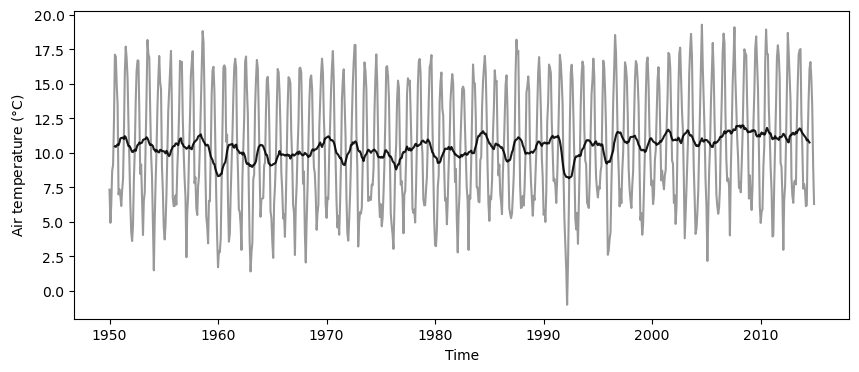

In [ ]:
# Plot air temperature with time
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plt.plot(time, surface_temp,
         color="gray", alpha=0.8)
plt.ylabel("Air temperature ($\degree$C)")
plt.xlabel("Time")

# Add rolling averages to this plot
# Annual rolling averages
rolling_surface_temp_12 = surface_temp.rolling(time=12, center=True).mean()
plt.plot(rolling_surface_temp_12.time, rolling_surface_temp_12,
         color="black", alpha=0.9)


## Climatology
In general, the "climatology" prediction is defined based on the temperature for a given location on a given date from the entire history. We generally assume we need at least 30 years of data.


In [ ]:
ds.lon.values

array(1.5)

## Advanced: consider changing climate.
How would you account for changing climate?

## BONUS EXERCISE
Repeat the exercice for December 2025. Compare your "predictions" to ECMWF seasonal forecasts for December which have been downloaded from the [Climate Data Store](https://cds.climate.copernicus.eu/datasets/seasonal-monthly-single-levels?tab=overview). The file tas_ECMWF_seasonal_forecast_ensemble_December_initNov2025_UK.nc contains an ensemble of seasonal forecasts released on 6th November, and contains the monthly statistic for December, so this could be considered a "sub-seasonal" forecast.

1) a) Plot the histogram of mean temperature for December using first last 30 years from GCM data.
   
   b) On the same figure, plot the histogram of December 2025 temperature using the ECMWF seasonal forecast ensemble.
2) a) Use linear regression to estimate the temperature on December 2025 using the GCM data.
   
   b) Compare this with the ECMWF ensemble mean and standard deviation. Which one do you trust the more? There's no right answer. Numerical weather forecasts one month ahead do not necessarily have much forecast skill. Figure 19 [in this article](https://gmd.copernicus.org/articles/12/1087/2019/gmd-12-1087-2019.pdf) can give some indication.

Tip: the file contains a few grid boxes. To select the one closest to Oxford, you can use `ds_s2s.sel(longitude=-1.2577, latitude=51.7520, method='nearest')`  

<img src="https://github.com/peterukk/IE_CDT_ClimateDynamicsTutorial/blob/main/forecastskillvstime.jpg?raw=1" alt="fc" class="bg-primary mb-1" width="500px">

In [ ]:
filename = data_path + "11f60389976ce46b3f1f4d7d3ad5a95f.nc"

In [ ]:
ds_s2s = xr.open_dataset(filename)
ds_s2s

<xarray.Dataset> Size: 26MB
Dimensions:                  (number: 51, forecast_reference_time: 1,
                              forecastMonth: 2, latitude: 180, longitude: 360)
Coordinates:
  * number                   (number) int64 408B 0 1 2 3 4 5 ... 46 47 48 49 50
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 8B 2025...
  * forecastMonth            (forecastMonth) int64 16B 1 2
  * latitude                 (latitude) float64 1kB 89.5 88.5 ... -88.5 -89.5
  * longitude                (longitude) float64 3kB 0.5 1.5 2.5 ... 358.5 359.5
Data variables:
    t2m                      (number, forecast_reference_time, forecastMonth, latitude, longitude) float32 26MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-09T17:43 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
ds_s2s.variables["forecast_reference_time"]

<xarray.IndexVariable 'forecast_reference_time' (forecast_reference_time: 1)> Size: 8B
array(['2025-11-01T00:00:00.000000000'], dtype='datetime64[ns]')
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [ ]:
s2s_data_oxford = ds_s2s.sel(longitude=-1.2577, latitude=51.7520, method='nearest')


In [ ]:
s2s_data_oxford.